# K-nearest neigbor

This supervised statistical method is an alternative to simple linear regression. Here it is introduced for the context of **regression problem**.

Import required libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the dataframe.

In [2]:
df = pd.read_csv("../data/Credit.csv")
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


For demonstration purposes we take only first 10 observations.

In [3]:
# Separating indpendent and dependent variable 
X = df[['Income']][0:10]
y = df['Limit'][0:10]


Plot these 10 points

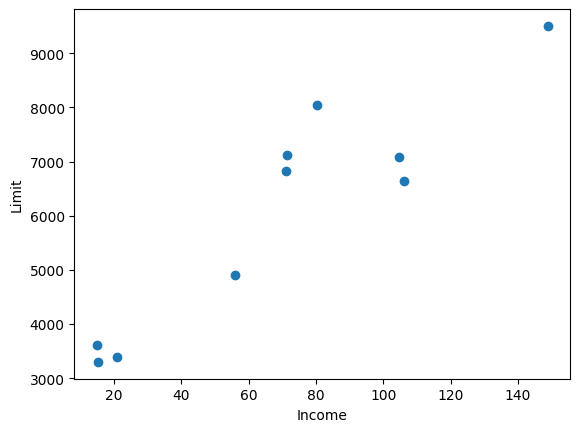

In [4]:
plt.scatter(X, y)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

K-nearest neighbor make prediction as follows: given a point $x_0$ where the prediction should be made the prediction is
$$\hat{y}(x_0) = \frac{1}{K} \sum_{i=1}^K y_i,$$
where $y_i$ are values of $K$ closest observations.

In [5]:
def k_nearest_neighbor(k, X, y, target):
    #First calculate distance from prediction point
    distance = abs(X - target)
    distance.sort_values(by=['Income'], inplace=True)

    #extract k indices that minimize distance
    k_nearest_index = list(distance.index[0:k])
    return y[k_nearest_index].sum()/k

Now, let's investigate how the model looks like on the graph

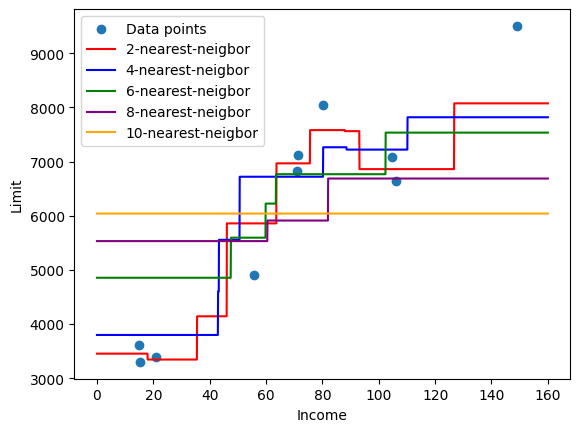

In [6]:
x_plot_values = np.linspace(0,160,2000)
colors = ['red', 'blue', 'green', 'purple', 'orange']
labels = []

plt.scatter(X, y)
labels.append("Data points")
neigbor_index = 2
for c in colors:
    y_predictions = np.array([k_nearest_neighbor(neigbor_index, X, y, t) for t in x_plot_values])
    plt.plot(x_plot_values, y_predictions, color=c)
    labels.append(str(neigbor_index) + "-nearest-neigbor")
    neigbor_index += 2

plt.legend(labels)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

**Observation:** as $K$ of the model increases the curve is becomming increasingly smooth until it reaches average model!

Let's try to fit the model to the full dataset with $k\in \{10, 20\}$

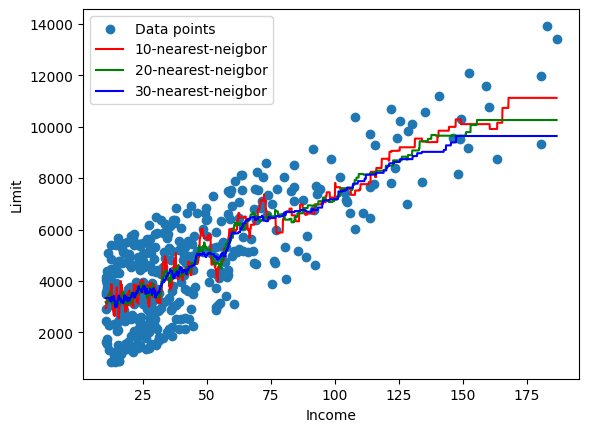

In [7]:
X_full = df[['Income']]
y_full = df['Limit']

x_plot_values = np.linspace(X_full.min(),X_full.max(),2000)
colors = ['red', 'green', 'blue']
labels = []

plt.scatter(X_full, y_full)
labels.append("Data points")
neigbor_index = 10
for c in colors:
    y_predictions = np.array([k_nearest_neighbor(neigbor_index, X_full, y_full, t) for t in x_plot_values])
    plt.plot(x_plot_values, y_predictions, color=c)
    labels.append(str(neigbor_index) + "-nearest-neigbor")
    neigbor_index += 10

plt.legend(labels)
plt.xlabel("Income")
plt.ylabel("Limit")
plt.show()

We see the same trend of decreasing variability of the model as we increse parameter $k$. It would be cumbersome to remember the model, but fortunatelly we can use the ``scikit-learn`` library for k-nearest-neighbor.

/home/adrian/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


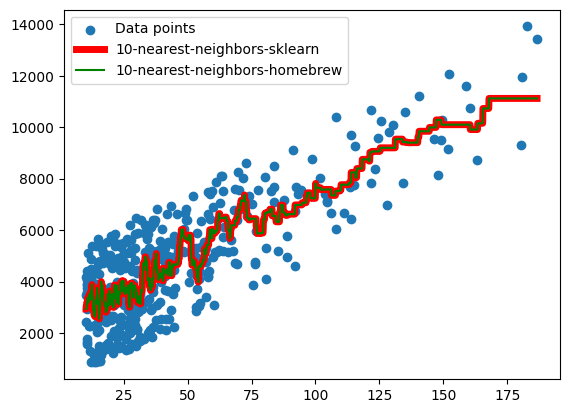

In [8]:
from sklearn.neighbors import KNeighborsRegressor

K = 10
model = KNeighborsRegressor(n_neighbors=K).fit(X_full, y_full)
y_sk_predict = model.predict(x_plot_values)
y_predictions = np.array([k_nearest_neighbor(K, X_full, y_full, t) for t in x_plot_values])


plt.scatter(X_full,y_full)
plt.plot(x_plot_values,y_sk_predict, color='red', linewidth=5)
plt.plot(x_plot_values, y_predictions, color='green')
plt.legend(['Data points', str(K)+"-nearest-neighbors-sklearn", str(K)+"-nearest-neighbors-homebrew"])
plt.show()

# Conclusion
K-nearest neighbor is another algorithm that can be used to approach regression problem. In this exercise we investigate how choice of $k$ affects the smoothness of fitted curve.